## Dataset Overview

In [55]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# تحميل ملف البيانات
# ----------------------------------
df_cleaned = pd.read_csv('C:/Users/LENOVO/Desktop/NN project/stock-trend-prediction/data/interim/train_clean_after_2010_and_bad_tickers.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned = df_cleaned[df_cleaned['date'] >= '2010-01-01']
df_cleaned = df_cleaned.sort_values(['ticker', 'date'])
grouped_by_ticker_cleaned = df_cleaned.groupby('ticker')

before cleaning :
Dataset Size: 21033522 rows × 9 columns
memory usage: 1.4 GB

after cleaning :
 Dataset Size: 12531070 rows × 9 columns
 memory usage: 956.0 MB

In [58]:

# ----------------------------------
# عرض حجم البيانات
# ----------------------------------
num_rows, num_cols = df_cleaned.shape
print(f"Dataset Size: {num_rows} rows × {num_cols} columns")

# ----------------------------------
# عرض أول 5 صفوف
# ----------------------------------
print("First 5 rows:")
display(df_cleaned.head())

# ----------------------------------
# عرض آخر 5 صفوف
# ----------------------------------
print("Last 5 rows:")
display(df_cleaned.tail())

# ----------------------------------
# معلومات عامة عن الـ DataFrame
# ----------------------------------
print("General DataFrame Information:")
df_cleaned.info()


Dataset Size: 12305719 rows × 11 columns
First 5 rows:


,ticker,date,open,high,low,close,volume,dividends,stock_splits,return,return_is_outlier
0,ticker_1,2010-01-04,27.875437,28.009543,27.570655,27.662090,2142300.0,0.0,0.0,NaN,False
1,ticker_1,2010-01-05,27.729151,27.814489,27.131774,27.302454,2856000.0,0.0,0.0,-0.013001,False
2,ticker_1,2010-01-06,27.278065,27.729145,27.278065,27.595039,2035400.0,0.0,0.0,0.010716,False
3,ticker_1,2010-01-07,27.637703,27.643798,27.375590,27.497503,1993400.0,0.0,0.0,-0.003535,False
4,ticker_1,2010-01-08,27.424356,27.613320,27.253676,27.582842,1306400.0,0.0,0.0,0.003104,False


Last 5 rows:


,ticker,date,open,high,low,close,volume,dividends,stock_splits,return,return_is_outlier
12305714,ticker_999,2024-09-17,87.059998,88.120003,87.059998,87.709999,997900.0,0.0,0.0,0.009553,False
12305715,ticker_999,2024-09-18,87.720001,87.959999,86.680000,86.870003,757100.0,0.0,0.0,-0.009577,False
12305716,ticker_999,2024-09-19,88.220001,89.089996,87.680000,88.800003,885900.0,0.0,0.0,0.022217,False
12305717,ticker_999,2024-09-20,89.019997,90.070000,88.610001,89.910004,1665400.0,0.0,0.0,0.012500,False
12305718,ticker_999,2024-09-23,90.070000,90.239998,89.480003,89.989998,569600.0,0.0,0.0,0.000890,False


General DataFrame Information:
<class 'pandas.DataFrame'>
RangeIndex: 12305719 entries, 0 to 12305718
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ticker             str           
 1   date               datetime64[us]
 2   open               float64       
 3   high               float64       
 4   low                float64       
 5   close              float64       
 6   volume             float64       
 7   dividends          float64       
 8   stock_splits       float64       
 9   return             float64       
 10  return_is_outlier  bool          
dtypes: bool(1), datetime64[us](1), float64(8), str(1)
memory usage: 950.6 MB


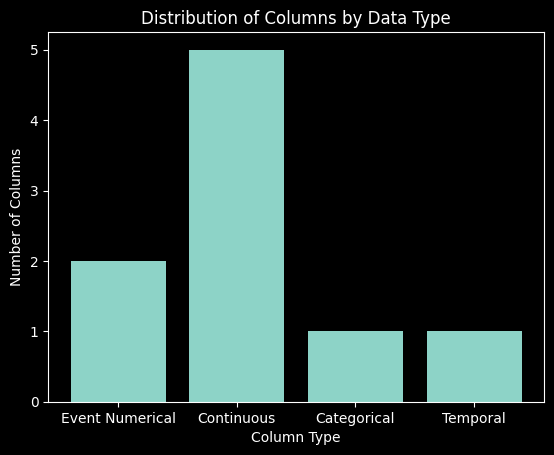

In [59]:
# Continuous Numerical Features
continuous_numerical_cols = [
    "Open",
    "High",
    "Low",
    "Close",
    "Volume"
]

# Numerical Features (Event-driven / Sparse)
event_numerical_cols = [
    "Dividends",
    "Stock Splits"
]

# Categorical Features
categorical_cols = [
    "Ticker"
]

# Temporal Features
temporal_cols = [
    "Date"
]
# ----------------------------------
# حساب عدد الأعمدة لكل نوع
# ----------------------------------
column_type_counts = {
    "Event Numerical": len(event_numerical_cols),
    "Continuous": len(continuous_numerical_cols),
    "Categorical": len(categorical_cols),
    "Temporal": len(temporal_cols)
}

# ----------------------------------
# رسم مخطط الأعمدة
# ----------------------------------
plt.figure()
plt.bar(column_type_counts.keys(), column_type_counts.values())
plt.title("Distribution of Columns by Data Type")
plt.xlabel("Column Type")
plt.ylabel("Number of Columns")
plt.show()

## Data Types & Missing Values Analysis

In [39]:
# عدد القيم المفقودة
missing_count = df_cleaned.isnull().sum()

# النسبة المئوية للقيم المفقودة
missing_percentage = (missing_count / len(df_cleaned)) * 100

# دمج النتائج في جدول واحد
missing_summary = pd.concat(
    [
        missing_count.rename("missing_count"),
        missing_percentage.rename("missing_percentage")
    ],
    axis=1
)

display(missing_summary)
empty_strings = (df_cleaned == " ").sum() + (df_cleaned == "").sum()
print(empty_strings)


,missing_count,missing_percentage
Ticker,0,0.0
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Dividends,0,0.0
Stock Splits,0,0.0


Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


البيانات نظيفة ومكتملة تماماً؛ لا توجد خلايا فارغة ($NaN$) ولا نصوص نائبة بمسافات("    " )، مما يؤكد جاهزيتها للتحليل المباشر.

In [66]:
# حساب عدد الصفوف لكل Ticker
ticker_counts = (
    df_cleaned.groupby("ticker")
      .size()
      .rename("num_observations")
      .reset_index()
)

ticker_counts.head()
coverage_stats = ticker_counts["num_observations"].agg(
    ["min", "mean", "median", "max"]
)

coverage_stats

min        224.000000
mean      2537.784904
median    3121.000000
max       3705.000000
Name: num_observations, dtype: float64

before cleaning :
* min = 224

أقصر شركة  لها 224 سطر في الداتا اي أقل من سنة و هذا أمر خطير نوعا ما

* median = 3010.5

نصف الشركات  لها 3010 اي ما يقارب 3 سنوات

* mean = 4206

التوزيع منحاز لليمين لأن الوسيط هو أكبر من المتوسط

* max = 15789

أطول سجل زمني لشركة واحدة هو 15789
********************************************************************************************
after cleaning :
* min = 224

أقصر شركة  لها 224 سطر في الداتا اي أقل من سنة و هذا أمر خطير نوعا ما

* median = 3121

نصف الشركات  لها 3121 اي ما يقارب 3 سنوات

* mean = 2537

التوزيع منحاز لليمين لأن الوسيط هو أكبر من المتوسط

* max = 3705

أطول سجل زمني لشركة واحدة هو 3705
********************************************************************************************
بعض الاستنتاجات :
1) الحد الأدنى (min = 224) لم يتغير
ما زال هناك سهم له سجل قصير جدًا (< سنة)
هذا سهم خطير نسبيًا لكنه:
لم يتأثر بفلترة التاريخ
غالبًا هو سهم حديث نسبيًا حتى بعد 2010

2) “السهم النموذجي” median في الداتا لم يتأثر بعملية التنظيف
معظم الأسهم:
كانت نشطة قبل 2010
واستمرت بعد 2010
 هذا مؤشر قوي أن اختيار 2010 لم يكن تعسفيًا أو مدمّرًا للبيانات

3) المتوسط (mean) انخفض بشدة 4206 ل  2537
هذا الانخفاض يخبرنا شيئًا مهمًا جدًا:
 قبل التنظيف:
المتوسط كان مرتفعًا بسبب عدد قليل من الأسهم ذات تاريخ قديم جدًا (outliers)

 بعد التنظيف:
تمت إزالة الجزء الأكبر من هذه الذّيول الطويلة
التوزيع أصبح:
أقل انحيازًا ,أقرب للواقع الفعلي للسوق الحديث
 هذا تحسين مباشر لجودة التدريب ️ يقلل خطر أن تهيمن أسهم “قديمة جدًا” على النموذج

4) القيمة العظمى (max) انهارت 15789 ل 3705
وهذه نتيجة مقصودة وممتازة.
 هذا يعني:
لم يعد هناك سهم “تاريخي متطرف” أقصى سجل زمني الآن ≈ 3705 يوم (حوالي 14–15 سنة)
كل الأسهم أصبحت ضمن نطاق زمني واقعي قابلة للمقارنة فيما بينها
 هذا يقلل ال Overfitting على أسهم قديمة جدًا

ملاحظة : الشركات صاحبة ال 224 سطر او الأقل من 500 صف تسبب عدم استقرار في التدريب او تضيف ضوجة (قد نستغني عنها)

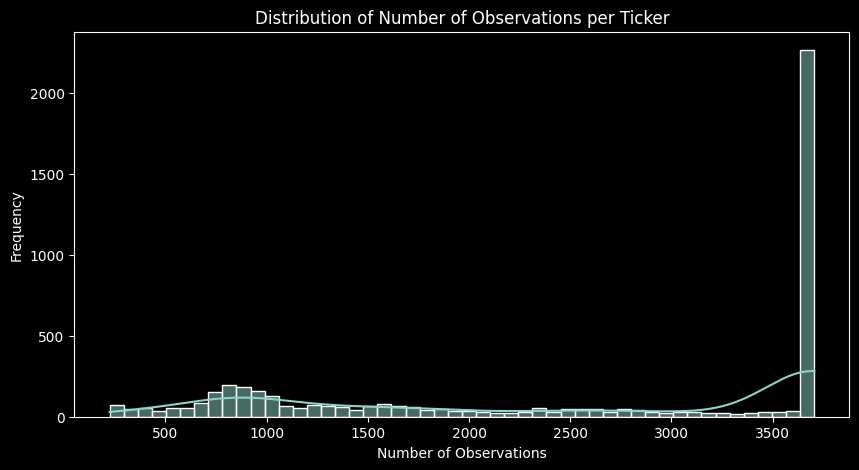

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(
    ticker_counts["num_observations"],
    bins=50,
    kde=True
)
plt.title("Distribution of Number of Observations per Ticker")
plt.xlabel("Number of Observations")
plt.ylabel("Frequency")
plt.show()

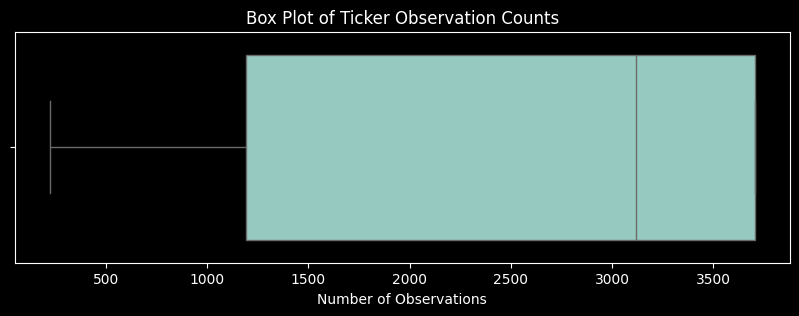

In [64]:
plt.figure(figsize=(10, 3))
sns.boxplot(
    x=ticker_counts["num_observations"]
)
plt.title("Box Plot of Ticker Observation Counts")
plt.xlabel("Number of Observations")
plt.show()

In [65]:
ticker_counts = (
    df_cleaned.groupby("ticker")
      .size()
      .rename("num_observations")
      .reset_index()
)
ticker_counts

,ticker,num_observations
0,ticker_1,3705
1,ticker_10,3705
2,ticker_100,3705
3,ticker_1000,3705
4,ticker_1001,3705
...,...,...
4844,ticker_995,3705
4845,ticker_996,3705
4846,ticker_997,3705
4847,ticker_998,3705


عدد أسهم الشركات القدامى كان 15789 و في مراحل حديثة اصبح عدد الأسهم تقريبا 7500 لذلك أضعف سهم لديك ما يزال يملك سجلًا زمنيًا غنيًا

In [70]:
df_cleaned["ticker"].nunique()

4849

 ملاحظة : تم التخلص من 11 شركة تقريبا بعد التنظيف

In [71]:
# ===============================
# 5️⃣ حساب الفترة الزمنية لكل Ticker
# ===============================

# تجميع البيانات حسب Ticker
ticker_date_range = df_cleaned.groupby('ticker')['date'].agg(
    start_date='min',
    end_date='max'
).reset_index()

# عرض أول 5 صفوف للتحقق
ticker_date_range.head()

# عرض بعض الإحصائيات السريعة
print("أقدم تاريخ لأي سهم:", ticker_date_range['start_date'].min())
print("أحدث تاريخ لأي سهم:", ticker_date_range['end_date'].max())
print("أقصر فترة زمنية لسهم:", (ticker_date_range['end_date'] - ticker_date_range['start_date']).min())
print("أطول فترة زمنية لسهم:", (ticker_date_range['end_date'] - ticker_date_range['start_date']).max())


أقدم تاريخ لأي سهم: 2010-01-04 00:00:00
أحدث تاريخ لأي سهم: 2024-09-23 00:00:00
أقصر فترة زمنية لسهم: 327 days 00:00:00
أطول فترة زمنية لسهم: 5376 days 00:00:00


In [72]:
# ===============================
# 6️⃣ إحصائيات وصفية للميزات الرقمية
# ===============================

num_cols = ['open', 'high', 'low', 'close', 'volume']

desc_stats = df_cleaned[num_cols].agg(
    ['mean', 'median', 'std', 'min', 'max']
).T

desc_stats

,mean,median,std,min,max
open,3.070729e+01,17.758924,3.889239e+01,0.00500,8.319200e+02
high,3.115415e+01,18.024254,3.942342e+01,0.08000,1.010080e+03
low,3.024735e+01,17.469999,3.834743e+01,0.00000,4.298801e+02
close,3.069983e+01,17.750000,3.888178e+01,0.07851,4.333400e+02
volume,1.324350e+06,213500.000000,5.640220e+06,0.00000,1.123003e+09


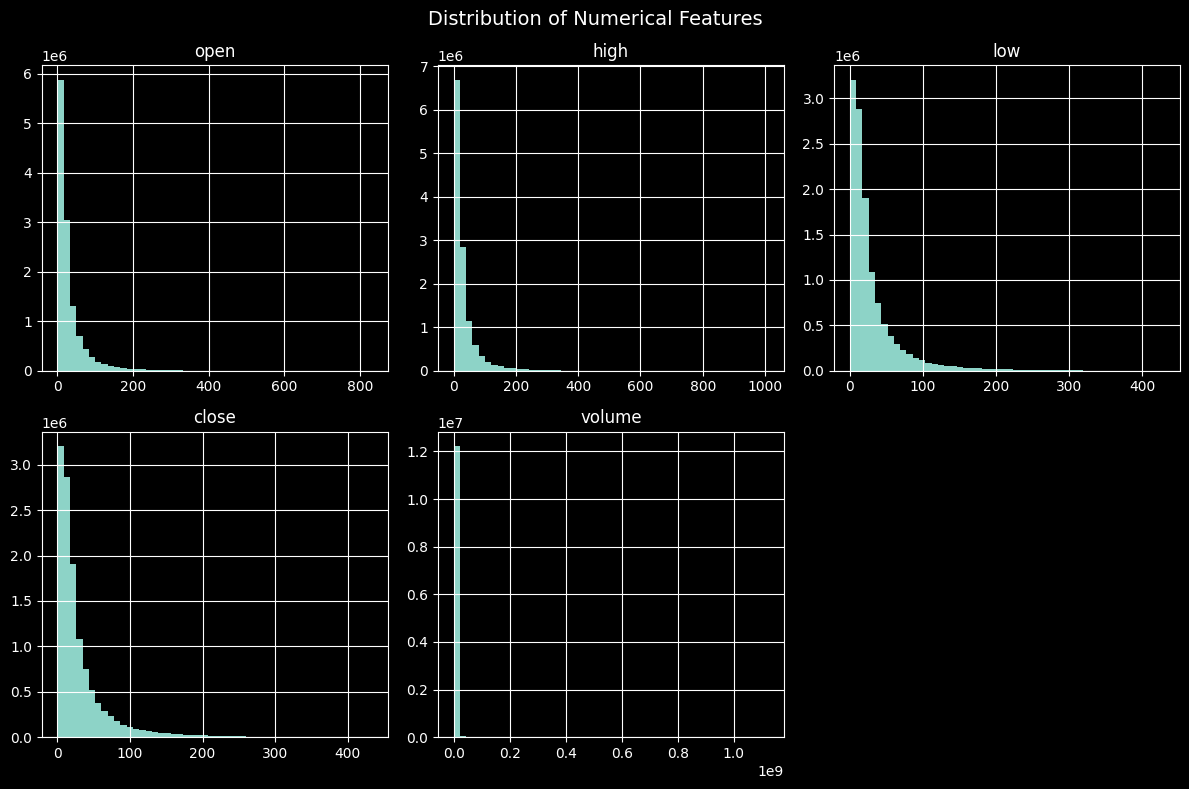

In [73]:
df_cleaned[num_cols].hist(
    bins=50,
    figsize=(12, 8),
    layout=(2, 3)
)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

أظهرت الإحصائيات الوصفية أن متغيرات الأسعار (Open, High, Low, Close) تعاني من انحياز إيجابي واضح، حيث تفوق القيم المتوسطة القيم الوسيطية، مع انحراف معياري مرتفع يدل على تقلب كبير بين الأسهم المختلفة.
كما أن متغير Volume يُظهر انحيازًا شديدًا وتباينًا عاليًا جدًا، مع وجود قيم قصوى كبيرة، مما يستوجب تطبيق تحويلات لوغاريتمية وتقنيات Scaling قوية قبل إدخاله إلى النموذج.
تؤكد هذه النتائج أن استخدام القيم الخام غير مناسب، وأن المعالجة المسبقة الدقيقة شرط أساسي لبناء نموذج تنبؤي مستقر.ب